# CNN 

An input image F(x,y) is convolved with a kernel (k) ... This is called Kernel Convolution and is represented by asterisk

K * F(x,y) = output image [this is not a multiplication]

Kernel convolution is an important operation in Computer vision applications and is the basis of Convolution Neural Networks


Multipliers in our kernels are often called Weights. because they determine how important (or how weighty) a pixel is in forming a new output image

-1 is a weight... and this entire matrix is a kernel

<img src = 'images/kernels.png' style = 'width: 400px'>

Edge Handling:
1. Extension - Border pixels are conceptually extended
2. Padding - image is padded with border of 0s
3. Crop - edges being cropped. output image will be slightly smaller

CNNs keep track of spatial information of image and learn to extract features (like the edges of objects) in something called a convolution layer

**Convolutional Layer** is produced by applying a series of many different image filters (also known as convolution kernels) to an input image

If we have 4 filters, we will have 4 collection of nodes. we will refer to them as Feature Maps
When we visualize these feature maps.. we see that they look like filtered images.
That is we have taken in all the dense information from the original image and outputed a much simpler image with less information

Edge detection filters are very important for CNNs

As we train the model using back propogation, filters are updated at each epoch to take on values that minimizes the loss function. In other words, CNN determines what kind of patterns it needs to detect based on the loss function


**Pooling Layers**: They take convolutional layers as input. We need a method for reducing dimensionality. This is the role of pooling layers.<br>
Number of feature maps remains the same but height n width of the feature map is reduced. In this case Width & Height are half of that of convolutional layer
<img src ='images/maxpool.png'>

## Visualize - Convolutional Layer

#### Import Libraries 

In [116]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Image

Actual image that we are trying to load
<img src='images/car.jpg' style = 'width: 300px'>

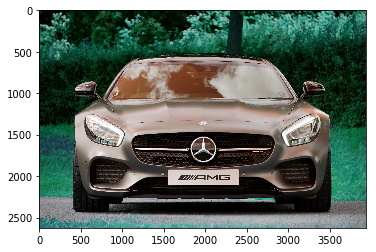

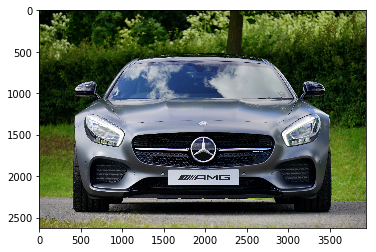

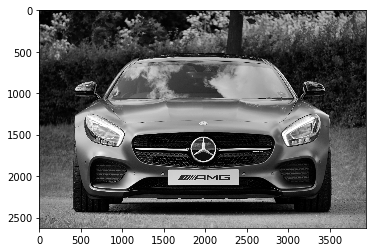

[[0.12941177 0.12941177 0.15686275 ... 0.00784314 0.         0.        ]
 [0.1254902  0.1254902  0.14901961 ... 0.00392157 0.         0.        ]
 [0.13333334 0.13333334 0.14901961 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.3254902  0.3019608  0.29803923 ... 0.5372549  0.5137255  0.5058824 ]
 [0.36078432 0.3529412  0.34509805 ... 0.53333336 0.5058824  0.50980395]
 [0.4        0.40784314 0.4        ... 0.5294118  0.50980395 0.52156866]]


In [57]:
img_path = 'images/car.jpg'

# load color image
img = cv2.imread(img_path)
#In the case of color images, the decoded images will have the channels stored in **B G R** order.
# If we use Matplotlib to show our images - it will be distorted
plt.imshow(img)
plt.show()
#Becuase matplotlib expected channels in - R G B order. So we need to convert it 

#Before that let's rename that image variable name to bgr so that it becomes more appropriate
img_bgr  = cv2.imread(img_path)

# Now convert it into rgb format
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Convert it into Grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap= 'gray')
plt.show()

# Normalize, rescale values to lie (0,1)
img_gray = img_gray.astype('float32')/255
print(img_gray)

#### Define and Visualize the Filters

In [7]:
filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

print ('Filter: \n', filter_vals)
print ('Filter shape: ', filter_vals.shape)

Filter: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]
Filter shape:  (4, 4)


In [46]:
# Defining 4 different filters
filter_1 = filter_vals
filter_2 = -1 * filter_1
filter_3 = filter_1.T
filter_4 = filter_2.T

filters = np.array([filter_1, filter_2, filter_3, filter_4])
print (filter_4)

[[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


Text(0.5,1,'Filter 1')

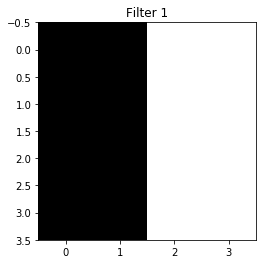

In [27]:
plt.imshow(filter_1, cmap='gray')
plt.title('Filter 1')

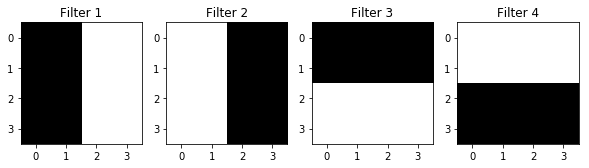

In [44]:
# Visualize all 4 filters
fig = plt.figure(figsize = (10, 5))

for i, f in enumerate(filters):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(f, cmap='gray')
    plt.title('Filter '+str(i+1) )

####  Define a Convolutional Layer

In [76]:
class Model (nn.Module):
    
    def __init__ (self, weight):
        super().__init__()
        self.conv = nn.Conv2d(1, 4, kernel_size = (4,4), stride=1, bias = False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Model(weight)

print ('Weight \n', weight)
print (model)

Weight 
 tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])
Model(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


####  Visualize the output of each layer

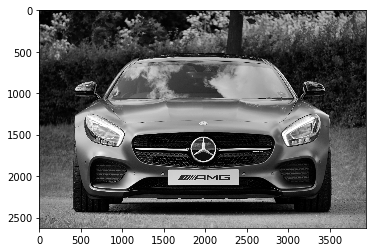

(2624, 3936)
[[0.12941177 0.12941177 0.15686275 ... 0.00784314 0.         0.        ]
 [0.1254902  0.1254902  0.14901961 ... 0.00392157 0.         0.        ]
 [0.13333334 0.13333334 0.14901961 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.3254902  0.3019608  0.29803923 ... 0.5372549  0.5137255  0.5058824 ]
 [0.36078432 0.3529412  0.34509805 ... 0.53333336 0.5058824  0.50980395]
 [0.4        0.40784314 0.4        ... 0.5294118  0.50980395 0.52156866]]
torch.Size([2624, 3936])
torch.Size([1, 2624, 3936])
torch.Size([1, 1, 2624, 3936])


In [79]:
# Plot original image
plt.imshow(img_gray, cmap = 'gray'); plt.show()

# convert the image into an input tensor
print (img_gray.shape)
print (img_gray)

img_gray_tensor = torch.from_numpy(img_gray).type(torch.FloatTensor)
print (img_gray_tensor.shape)

# We have got our image in tensor way.. but it's shape is not yet ready for putting in model. 
# if we put in model we will get error
# conv_layer, act_layer = model(img_gray_tensor)
# ------- Error
# Expected 4-dimensional input for 4-dimensional weight [4, 1, 4, 4], but got input of size [2624, 3936]

# The required shape for the model is ( num_imgs, num_channels, height, width)
# So we need to change the shape of our image tensor
# We will use unsqueeze method to add one dimension to our image tensor. 
# Note that we need to add 2 dimensions. so we will have to use unsqueeze twice

# add 1 dimension
img_gray_tensor.unsqueeze_(0)
print (img_gray_tensor.shape)

# adding 1 more dimension
img_gray_tensor.unsqueeze_(0)
print (img_gray_tensor.shape)

conv_layer, act_layer = model(img_gray_tensor)

In [81]:
conv_layer.shape

torch.Size([1, 4, 2621, 3933])

In [85]:
conv_layer[:,1,:,:].squeeze().shape

torch.Size([2621, 3933])

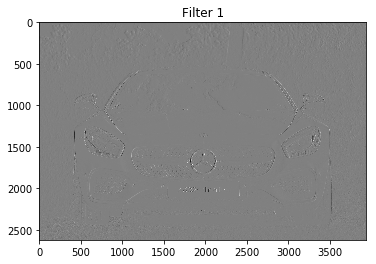

In [87]:
plt.imshow(conv_layer[:,1,:,:].squeeze().data.numpy(), cmap = 'gray')
plt.title('Filter 1')
plt.show()

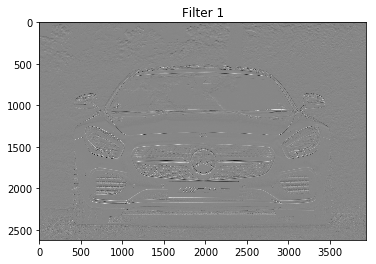

In [91]:
plt.imshow(conv_layer[:,3,:,:].squeeze().data.numpy(), cmap = 'gray')
plt.title('Filter 1')
plt.show()

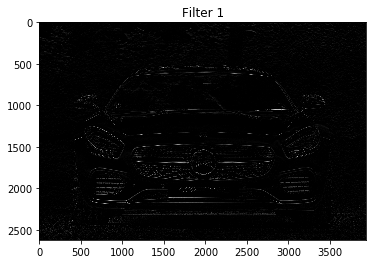

In [92]:
plt.imshow(act_layer[:,3,:,:].squeeze().data.numpy(), cmap = 'gray')
plt.title('Filter 1')
plt.show()

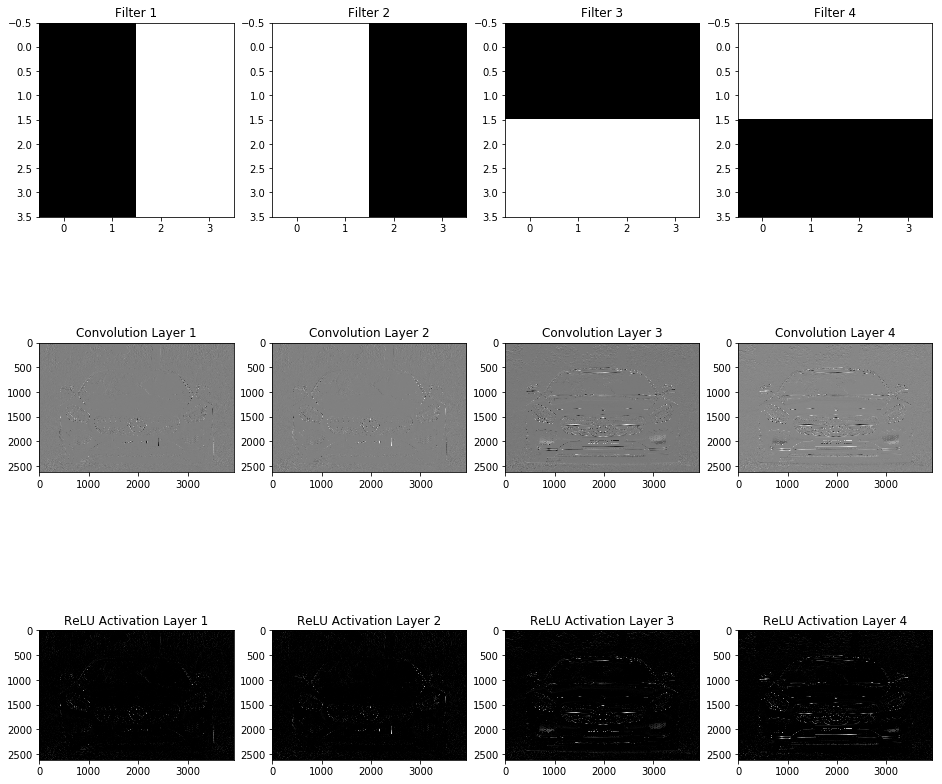

In [115]:
# Visualize all the filters 

fig = plt.figure(figsize = (16, 15))

for i in range(4):

    ax1 = fig.add_subplot(3, 4, i+1)
    ax1.imshow(filters[i], cmap='gray')
    ax1.set_title('Filter '+str(i+1))

    ax2 = fig.add_subplot(3, 4, i+5)
    ax2.imshow(conv_layer[:,i,:,:].squeeze().data.numpy(), cmap = 'gray')
    ax2.set_title('Convolution Layer '+str(i+1))

    ax3 = fig.add_subplot(3, 4, i+9)
    ax3.imshow(act_layer[:,i,:,:].squeeze().data.numpy(), cmap = 'gray') 
    ax3.set_title('ReLU Activation Layer '+str(i+1))

    # plt.title('Filter '+str(i))


## CNN Architecture

One of the complication with images is that ... all the images will have different dimensions.

**CNNs also require fixed size input**. So we have to pick an image size and resize all of our images to that same size before doing anything else

As a common practice - resize each image to be a square

Our CNN Architecture is designed with the goal of taking an image array and gradually making it much deeper than it is tall or wide

Convolutional layers will increase the depth & Maxpooling with decrease the x,y dimension. 

1. As the network gets deeper, its actually extracting more and more complex patterns and features that help identify the content and the objects in the image
2. And its actually discarding some spatial information about features like a smooth background and so on that do not help identify the image
<img src = 'images/cnnarch.png'>

**MAXPOOLING**<br>
>To decrease the height and width and discard some spatial information. Filter_size & Stride

**PADDING**<br>
You will get better results if you set your padding such that a convolution layer will have the same height & Width as previous layer<br>
> Think about what happens when you overlay nxn kernel so that it's center pixel is at the right-edge of an image. how many kernel columns will not overlay anything? That's how big your padding need to be

**FEATURE VECTOR**
>The layers in a CNN convert an input image array into a representation that encodes only the content of the image. This is often called a feature level reprsentation of an image or a Feature Vector

<img src = 'images/cnnarch2.png'>

## Convolutional Layer in PyTorch

In [2]:
# Convolutional Layers in PyTorch
class Model (nn.Module):
    def __init__(self):
        super.__init__()
        self.conv = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size=3, stride=1, padding=0, bias=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        
        
        return x

In [3]:
# Convolutional Layers in PyTorch
class Model (nn.Module):
    def __init__(self):
        super.__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size=3, stride=1, padding=0, bias=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels= 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        
        return x

## Coding CNN Architecture - CIFAR 10

#### Import Libraries 

In [48]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####  Test for CUDA

In [119]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print ('CUDA is not available .... training on CPU')
else:
    print ('CUDA is available.... training on GPU')

CUDA is not available .... training on CPU


#### Load and Visualize the Data

In [77]:
# Create Datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
train_data = datasets.CIFAR10('CIFAR10_data', download=True, train=True, transform=transform)
test_data = datasets.CIFAR10('CIFAR10_data', download = True, train = False, transform=transform)

print ('Train Data Size: ', len(train_data))
print ('Test Data Size: ', len(test_data))

Files already downloaded and verified
Files already downloaded and verified
Train Data Size:  50000
Test Data Size:  10000


In [51]:
# Use SubsetRandomSampler to Create Validation Set
train_size, valid_size = 0.8, 0.2
split = int(train_size * len(train_data))
# print (split)
indices = list(range(len(train_data)))
# print (indices)
np.random.shuffle(indices)
train_idx, valid_idx = indices[:split], indices[split:]
train_sample, valid_sample = SubsetRandomSampler(train_idx), SubsetRandomSampler(valid_idx)


In [52]:
# Create Data Loaders
train_loader = DataLoader(train_data, batch_size=20,  sampler=train_sample)
valid_loader = DataLoader(train_data, batch_size=20,  sampler=valid_sample)
test_loader = DataLoader(test_data, batch_size=20, shuffle=True)

#### Visualize the Data 

In [53]:
data_iter = iter(train_loader)
x , y = next(data_iter)
print (x.shape)
print (x)
print (y)

torch.Size([20, 3, 32, 32])
tensor([[[[-0.7882, -0.7961, -0.8196,  ..., -0.8275, -0.8039, -0.7882],
          [-0.7882, -0.8039, -0.8196,  ..., -0.8196, -0.7882, -0.7804],
          [-0.7804, -0.7961, -0.8118,  ..., -0.8196, -0.7804, -0.7725],
          ...,
          [-0.2000, -0.1843, -0.3490,  ..., -0.5059, -0.3255, -0.4196],
          [-0.2000, -0.1608, -0.2078,  ..., -0.2314, -0.2314, -0.3961],
          [-0.2941, -0.2157, -0.1765,  ..., -0.2314, -0.2627, -0.4039]],

         [[-0.6392, -0.6549, -0.6784,  ..., -0.6863, -0.6627, -0.6471],
          [-0.6314, -0.6471, -0.6706,  ..., -0.6784, -0.6392, -0.6314],
          [-0.6157, -0.6392, -0.6627,  ..., -0.6706, -0.6235, -0.6157],
          ...,
          [-0.1059, -0.1059, -0.3490,  ..., -0.5216, -0.2549, -0.3725],
          [-0.0980, -0.0667, -0.1451,  ..., -0.1843, -0.1373, -0.3412],
          [-0.2157, -0.1373, -0.0902,  ..., -0.1686, -0.1843, -0.3412]],

         [[-0.7098, -0.7255, -0.7490,  ..., -0.7333, -0.7098, -0.6941],
  

tensor([7, 7, 7, 4, 6, 6, 2, 0, 4, 9, 2, 3, 7, 0, 4, 8, 9, 5, 5, 4])


TypeError: Invalid dimensions for image data

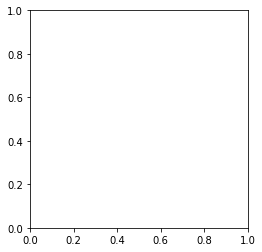

In [30]:
img = x[0]/ 2 + 0.5
plt.imshow(img)
plt.title(y[0].item())
plt.show()

In [31]:
print (x[0].shape)
print (x[0])


torch.Size([3, 32, 32])
tensor([[[ 0.0667,  0.4824,  0.7176,  ...,  0.1059,  0.2706,  0.0275],
         [-0.1373,  0.3333,  0.6784,  ...,  0.3569,  0.5451,  0.3333],
         [-0.0980,  0.2392,  0.6627,  ...,  0.5765,  0.6706,  0.6000],
         ...,
         [ 0.7647,  0.4588,  0.0824,  ...,  0.1216,  0.1608,  0.1922],
         [ 0.7569,  0.7333,  0.7098,  ...,  0.1294,  0.1922,  0.2314],
         [ 0.7098,  0.6471,  0.7333,  ...,  0.2941,  0.3647,  0.3412]],

        [[-0.1216,  0.3176,  0.5451,  ...,  0.1216,  0.2392,  0.0275],
         [-0.2863,  0.2078,  0.5216,  ...,  0.2235,  0.3725,  0.2078],
         [-0.2235,  0.1216,  0.5137,  ...,  0.3490,  0.4275,  0.3961],
         ...,
         [ 0.5686,  0.2471, -0.1059,  ..., -0.2627, -0.2549, -0.2392],
         [ 0.5529,  0.5294,  0.5059,  ..., -0.2863, -0.2627, -0.2392],
         [ 0.4980,  0.4510,  0.5608,  ..., -0.1843, -0.1373, -0.1765]],

        [[-0.2706,  0.0980,  0.3020,  ..., -0.5922, -0.3882, -0.6078],
         [-0.3647,  0

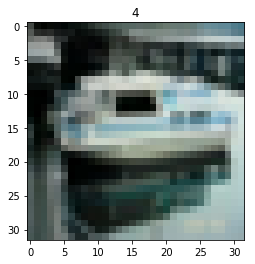

In [36]:
img2 = x[1].permute(1,2,0)
# print (img2)
img2 = img2/2 + 0.5
plt.imshow(img2)
plt.title(y[0].item())
plt.show()

In [16]:
# helper function to un-normalize and display an image
def helper(img):
    img = img / 2 + 0.5
    plt.imshow(img.squeeze(), cmap = 'gray')

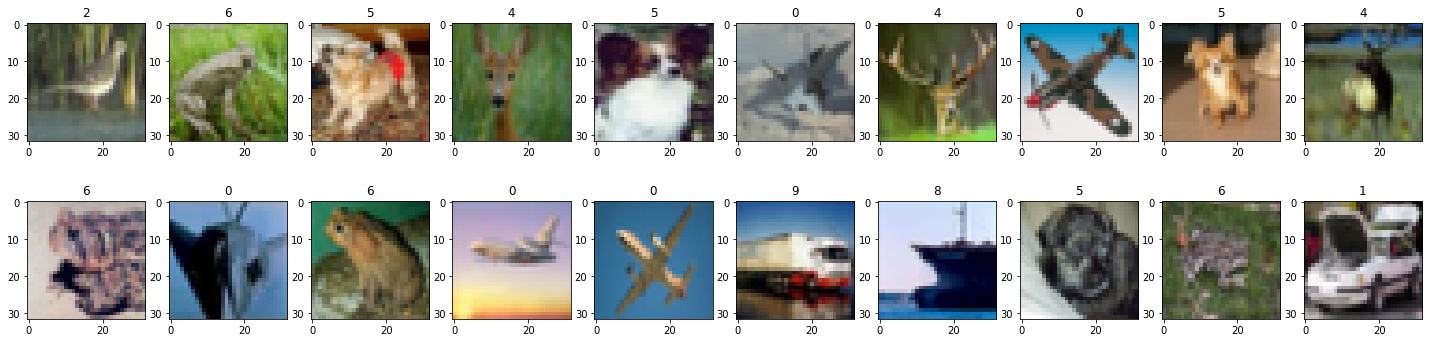

In [43]:
# Obtain one batch and plot images
# We have define data iter, x and y above so we will just use that

fig = plt.figure( figsize = (25, 6))
for ix in range(20):
    fig.add_subplot(2, 10, ix+1)
    img = x[ix].permute(1,2,0)
    img = img * 0.5 + 0.5
    #img = img.numpy()
    plt.imshow(img)
    plt.title(y[ix].item())


#### View an image in more detail

#### Define the CNN Architecture

In [109]:
# Define the model

class Model (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride = 2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias = True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # after this 8x8 and 32 channels. so number of paramters = 8*8*32
        
        self.fc = nn.Linear(in_features=8*8*32, out_features=10, bias = True)
        
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        # x = (x-F+2p/ s) + 1
        
    def forward (self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = x.view(-1, 8*8*32)
        x = self.logsoftmax(self.fc(x))
        return x
    
model = Model()
print (model)

loss_fn = nn.NLLLoss()
optimizer = optim.Adam(params=model.parameters())

Model(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax()
)


#### Training the model

In [110]:
# training loop

epochs = 10
train_losses, valid_losses = [], []
valid_loss_min = np.inf

model.train()
for epoch in range(epochs):
    train_loss, valid_loss = 0.0, 0.0
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred_score = model.forward(x)
        loss = loss_fn(y_pred_score, y)
        loss.backward()
        optimizer.step()
        
        #train_loss = train_loss + loss.item() # this is avg loss for that batch
        train_loss = train_loss + loss.item() * len(x) # multiplied by batch size
        
    else:
        model.eval()
        for xv, yv in valid_loader:
            yv_pred_score = model.forward(xv)
            lossv = loss_fn(yv_pred_score, yv)
            valid_loss = valid_loss + lossv.item()* len(xv)
        
    train_loss = train_loss / len(train_loader.dataset) # this will give us the avg loss for the entire training dataset
    valid_loss = valid_loss / len(valid_loader.dataset)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print (' Epochs {}/{}'.format(epoch+1, epochs), 
           'Training loss: {:.3f}'.format(train_loss), 
           'Validation Loss: {:.3f}'.format(valid_loss))

print ('------------- Training completed')

 Epochs 1/10 Training loss: 1.119 Validation Loss: 0.229
 Epochs 2/10 Training loss: 0.851 Validation Loss: 0.205
 Epochs 3/10 Training loss: 0.747 Validation Loss: 0.190
 Epochs 4/10 Training loss: 0.687 Validation Loss: 0.192
 Epochs 5/10 Training loss: 0.647 Validation Loss: 0.183
 Epochs 6/10 Training loss: 0.612 Validation Loss: 0.185
 Epochs 7/10 Training loss: 0.586 Validation Loss: 0.186
 Epochs 8/10 Training loss: 0.564 Validation Loss: 0.185
 Epochs 9/10 Training loss: 0.544 Validation Loss: 0.188
 Epochs 10/10 Training loss: 0.525 Validation Loss: 0.191
------------- Training completed


#### Plot Training & Validation Loss

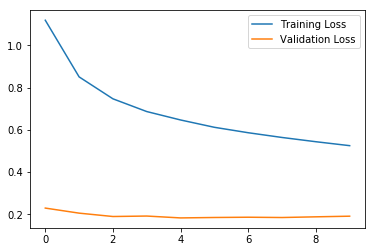

In [111]:
plt.plot(train_losses, label = 'Training Loss')
plt.plot(valid_losses, label = 'Validation Loss')
plt.legend()
plt.show()

#### Test Score

In [73]:
test_data.test_data.shape

(10000, 32, 32, 3)

In [136]:
# Test the trained model
test_loss = 0.0
test_accuracy = 0.0

with torch.no_grad():
    model.eval()
    for xt, yt in test_loader:
        yt_pred_score = model.forward(xt)
        losst = loss_fn(yt_pred_score, yt)

        # Accumulate the loss for entire test dataset
        test_loss = test_loss + losst.item() * len(xt)

        # Calculate accuracy
        yt_pred_probs = torch.exp(yt_pred_score)
        yt_pred_prob, yt_pred_label = torch.max(yt_pred_probs, dim=1)
        correct = yt == yt_pred_label
        # print (correct) # note that this correct is byte tensor, we have to convert into float tensor
        # correct.type(dtype = torch.FloatTensor)
        # torch.mean(correct.type(dtype = torch.FloatTensor)).item()
        # this is mean accuracy for that batch. 
        test_accuracy = test_accuracy+torch.mean(correct.type(dtype = torch.FloatTensor)).item()

    test_accuracy = test_accuracy / len(test_loader)
    # In order to get the overall accuracy, i need to divide the sum of accuracy by number of batches and
    # not by number of dataset elements
    test_loss = test_loss / len(test_loader.dataset)
    print ('Test loss : ', test_loss)
    print ('accuracy : ', test_accuracy*100)

343.20000046491623
Test loss :  0.9431441544294358
accuracy :  68.64000009298324


In [92]:
torch.max(yt_pred_probs, dim=1)

(tensor([0.5597, 1.0000, 0.3260, 0.6716, 0.9265, 0.9997, 0.9845, 0.9860, 0.3526,
         0.7100, 0.9906, 0.9997, 0.3153, 0.9291, 0.9870, 0.5106, 0.8216, 0.7840,
         0.2546, 0.6984], grad_fn=<MaxBackward0>),
 tensor([4, 7, 6, 9, 4, 7, 4, 7, 5, 3, 8, 9, 3, 8, 1, 7, 1, 7, 2, 0]))

In [95]:
yt_pred_label

tensor([0, 3, 1, 1, 1, 3, 3, 5, 8, 3, 3, 1, 1, 4, 5, 7, 2, 7, 3, 0])

In [129]:
print (correct)
print (correct.type(dtype = torch.FloatTensor))

tensor([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
       dtype=torch.uint8)
tensor([0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 1.])


In [131]:
torch.mean(correct.type(dtype = torch.FloatTensor)).item()

0.699999988079071

In [130]:
len(test_loader.dataset)

10000

In [106]:
len(train_loader.dataset)

50000

In [103]:
len(train_loader.dataset)

50000

In [101]:
test_loader